In [1]:
import math
import scipy.ndimage as ndi
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open("./data/dogs-vs-cats/train/cat.10179.jpg").convert('L')

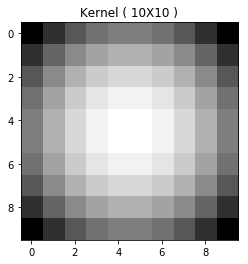

array([[0.9401382 , 0.95181678, 0.96067083, 0.96661924, 0.96960724,
        0.96960724, 0.96661924, 0.96067083, 0.95181678, 0.9401382 ],
       [0.95181678, 0.96364044, 0.97260448, 0.97862678, 0.9816519 ,
        0.9816519 , 0.97862678, 0.97260448, 0.96364044, 0.95181678],
       [0.96067083, 0.97260448, 0.9816519 , 0.98773022, 0.99078348,
        0.99078348, 0.98773022, 0.9816519 , 0.97260448, 0.96067083],
       [0.96661924, 0.97862678, 0.98773022, 0.99384617, 0.99691834,
        0.99691834, 0.99384617, 0.98773022, 0.97862678, 0.96661924],
       [0.96960724, 0.9816519 , 0.99078348, 0.99691834, 1.        ,
        1.        , 0.99691834, 0.99078348, 0.9816519 , 0.96960724],
       [0.96960724, 0.9816519 , 0.99078348, 0.99691834, 1.        ,
        1.        , 0.99691834, 0.99078348, 0.9816519 , 0.96960724],
       [0.96661924, 0.97862678, 0.98773022, 0.99384617, 0.99691834,
        0.99691834, 0.99384617, 0.98773022, 0.97862678, 0.96661924],
       [0.96067083, 0.97260448, 0.9816519

In [15]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), (size // 2), size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.max()
    
    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()

    return kernel_2D

    
def gaussian_blur(img, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=20, verbose=verbose)
    return kernel

gaussian_blur(img, 10, verbose=True)